## <최종 프로젝트> ##

### 하위목표 1. 해당역 시간별 혼잡도 그래프(담당: 안태현)

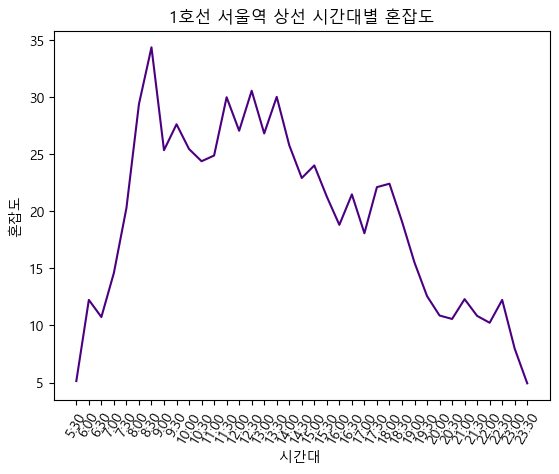

In [4]:
import csv
import matplotlib.pyplot as plt

x_time = ['5:30','6:00','6:30','7:00','7:30','8:00','8:30','9:00','9:30','10:00','10:30',
          '11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30',
          '16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30',
          '21:00','21:30','22:00','22:30','23:00','23:30']

f = open('seoulSubwayCongestion_20211231.csv',encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

for row in data:
    for i in range(len(row)):
        if i == 2:
            row[i] = int(row[i])
        elif i>5:
            row[i] = float(row[i])

subway_line,subway_name,subway_dir = input('호선, 출발역, 방향').split()

select_subway = []
total_select_subway = [0]*37


for row in data:    
    if row[2]== int(subway_line) and row[4] == subway_name and row[5] == subway_dir:
        select_subway.append(row)

for row in select_subway:
    for i in range(len(row)):
        if i > 5:
            total_select_subway[i-6] += row[i] 

total_select_subway = [com/len(select_subway) for com in total_select_subway]

plt.rc('font', family='Malgun Gothic')
plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 시간대별 혼잡도') 
plt.plot(range(37), total_select_subway, color='indigo') 
plt.xticks(range(37), x_time,rotation=60) 
plt.xlabel('시간대 ') 
plt.ylabel('혼잡도') 
plt.show()



### 하위목표 2. 해당역 주중, 주말 시간별 혼잡도 그래프(담당 : 윤철식)

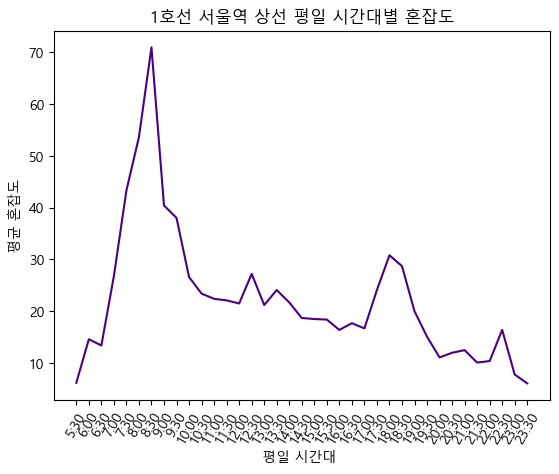

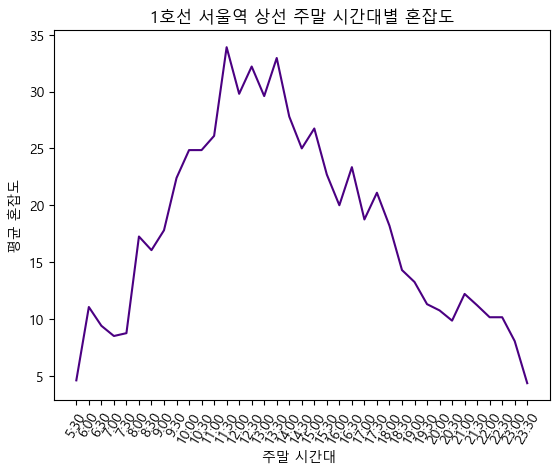

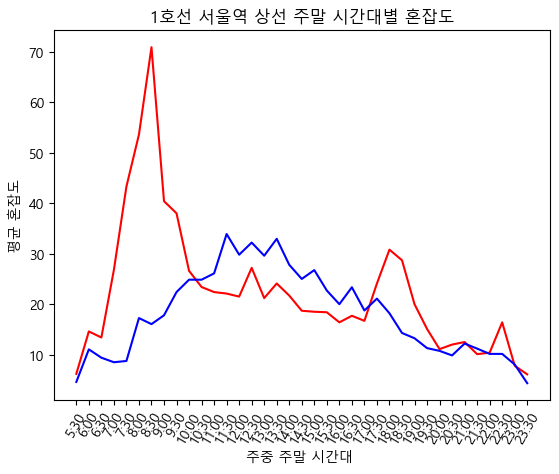

In [26]:
import csv
import matplotlib.pyplot as plt

f = open('seoulSubwayCongestion_20211231.csv',encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

for row in data:
    for i in range(len(row)):
        if i == 2:
            row[i] = int(row[i])
        elif i>5:
            row[i] = float(row[i])

subway_line,subway_name,subway_dir = input('호선, 출발역, 방향').split()
weekday_select_subway = []
weekend_select_subway = []
total_weekend_select_subway = [0]*37
x_time = ['5:30','6:00','6:30','7:00','7:30','8:00','8:30','9:00','9:30','10:00','10:30',
          '11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30',
          '16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30',
          '21:00','21:30','22:00','22:30','23:00','23:30']

for row in data:    
    if row[2]== int(subway_line) and row[4] == subway_name and row[5] == subway_dir:
        if row[1] == '평일':
            weekday_select_subway.append(row)
        else : 
            weekend_select_subway.append(row)

for row in weekend_select_subway:
    for i in range(len(row)):
        if i > 5:
            total_weekend_select_subway[i-6] += row[i]


total_weekend_select_subway = [com/len(weekend_select_subway) for com in total_weekend_select_subway]

plt.figure(1)
plt.rc('font', family='Malgun Gothic')
plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 평일 시간대별 혼잡도') 
plt.plot(range(37), weekday_select_subway[0][6:], color='indigo') 
plt.xticks(range(37), x_time,rotation=60) 
plt.xlabel('평일 시간대 ') 
plt.ylabel('평균 혼잡도') 

plt.figure(2)
plt.rc('font', family='Malgun Gothic')
plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 주말 시간대별 혼잡도') 
plt.plot(range(37), total_weekend_select_subway, color='indigo') 
plt.xticks(range(37), x_time,rotation=60) 
plt.xlabel('주말 시간대 ') 
plt.ylabel('평균 혼잡도') 

plt.figure(3)
plt.rc('font', family='Malgun Gothic')
plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 평일 시간대별 혼잡도') 
plt.plot(range(37), weekday_select_subway[0][6:], color='red') 
plt.xticks(range(37), x_time,rotation=60) 

plt.rc('font', family='Malgun Gothic')
plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 주말 시간대별 혼잡도') 
plt.plot(range(37), total_weekend_select_subway, color='blue') 
plt.xticks(range(37), x_time,rotation=60) 
plt.xlabel('주중 주말 시간대 ') 
plt.ylabel('평균 혼잡도') 

plt.show()



### 하위목표 3.  해당역 및 해당 호선 시간대별 하차 그래프(담당: 나혜원)

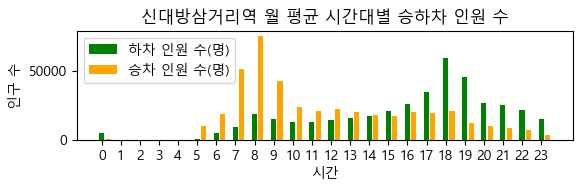

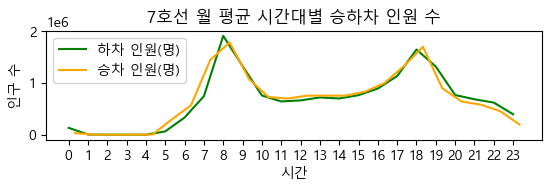

In [27]:
# 데이터 불러오기
import csv
import matplotlib.pyplot as plt

f1 = open('seoulSubwayTimePlace.csv',encoding='cp949')
data = csv.reader(f1)
next(data)
data = list(data)

# 데이터 리스트로 저장
line_data = []  # 입력받은 지하철 노선의 자료만 가지고 올 빈 리스트 
line_num = input('확인하고 싶은 지하철의 노선은? : ')  # 숫자만 입력

for row in data:
    # (line_num)호선 & 202206 - 202301까지 8개월의 자료만 가지고 오기
    if row[1] == line_num + '호선' and int(row[0]) >= 202206:
        line_data.append(row)

# 하차 인원수 숫자형으로 변환
for row in line_data:
    for i in range(len(line_data[0])):
        if i > 2:
            row[i] = float(row[i])
            

## 시간대별 월 평균 역 하차 인원수 구하기

offPopulation = [0 for i in range(24)]
onPopulation = [0 for i in range(24)]

train = input('지하철 역을 입력하세요! : ')

offTrain = {}
# 하차 인원만 더하기
offSum = 0 # 역별 하차 인원 표현한 변수 초기화
for row in line_data:
    if row[2] not in offTrain:  # row[2] = 역 이름
        for i in range(4,len(row),2):  # 4부터 짝수 인덱스인 값만 가져와야 함
            offSum += row[i]
        offTrain[row[2]] = offSum
    else:
        for i in range(4,len(row),2):
            offTrain[row[2]] += row[i]

if train in offTrain.keys():
    for row in line_data:
        if row[2] == train:
            for i in range(24):
                offPopulation[i] += row[2*i + 4]
                onPopulation[i] += row[2*i + 3]
            

# print(offPopulation)
# print(train_name)
# 소수점 첫째자리까지 반올림
offPopulation = [round(p/8, 1) for p in offPopulation] 
onPopulation = [round(p/8, 1) for p in onPopulation] 

# 시간 순서 맞추기(4시-3시  => 0시 23시)
off_train_Population = offPopulation[20:] + offPopulation[0:20]
on_train_Population = onPopulation[20:] + onPopulation[0:20]

# print(off_train_Population)

# 그래프그리기
plt.subplot(3,1,1)
plt.rc('font', family='Malgun Gothic')
plt.title(train + '역 월 평균 시간대별 승하차 인원 수')
plt.bar(range(0, 72, 3), off_train_Population, color='green', label='하차 인원 수(명)')
plt.bar(range(1, 72, 3), on_train_Population, color='orange', label='승차 인원 수(명)')
plt.legend()
plt.xticks(range(0, 72, 3), range(24))
plt.xlabel('시간')
plt.ylabel('인구 수')
plt.show()

## 시간대별 호선 월 평균 하차 인구 수 구하기
for row in line_data:
    for i in range(24):
        offPopulation[i] += row[2*i + 4]
        onPopulation[i] += row[2*i + 3]

# 소수점 첫째자리까지 반올림
offPopulation = [round(p/8, 1) for p in offPopulation]    
onPopulation = [round(p/8, 1) for p in onPopulation]
# print(offPopulation)

# 시간 순서(0시-23시로 맞추기
off_line_Population = offPopulation[20:] + offPopulation[0:20]
on_line_Population = onPopulation[20:] + onPopulation[0:20]

# 그래프 표현
plt.subplot(3,1,3)
plt.rc('font', family='Malgun Gothic')
plt.title(line_num + '호선 월 평균 시간대별 승하차 인원 수')
plt.plot(range(0, 72, 3), off_line_Population, color='green', label='하차 인원(명)')
plt.plot(range(1, 72, 3), on_line_Population, color='orange', label='승차 인원(명)')
plt.legend()
plt.xticks(range(0, 72, 3), range(24))
plt.xlabel('시간')
plt.ylabel('인구 수')
plt.show()

### 하위목표 4.해당역 호선 승하차 top10 그래프(담당 : 조성웅)

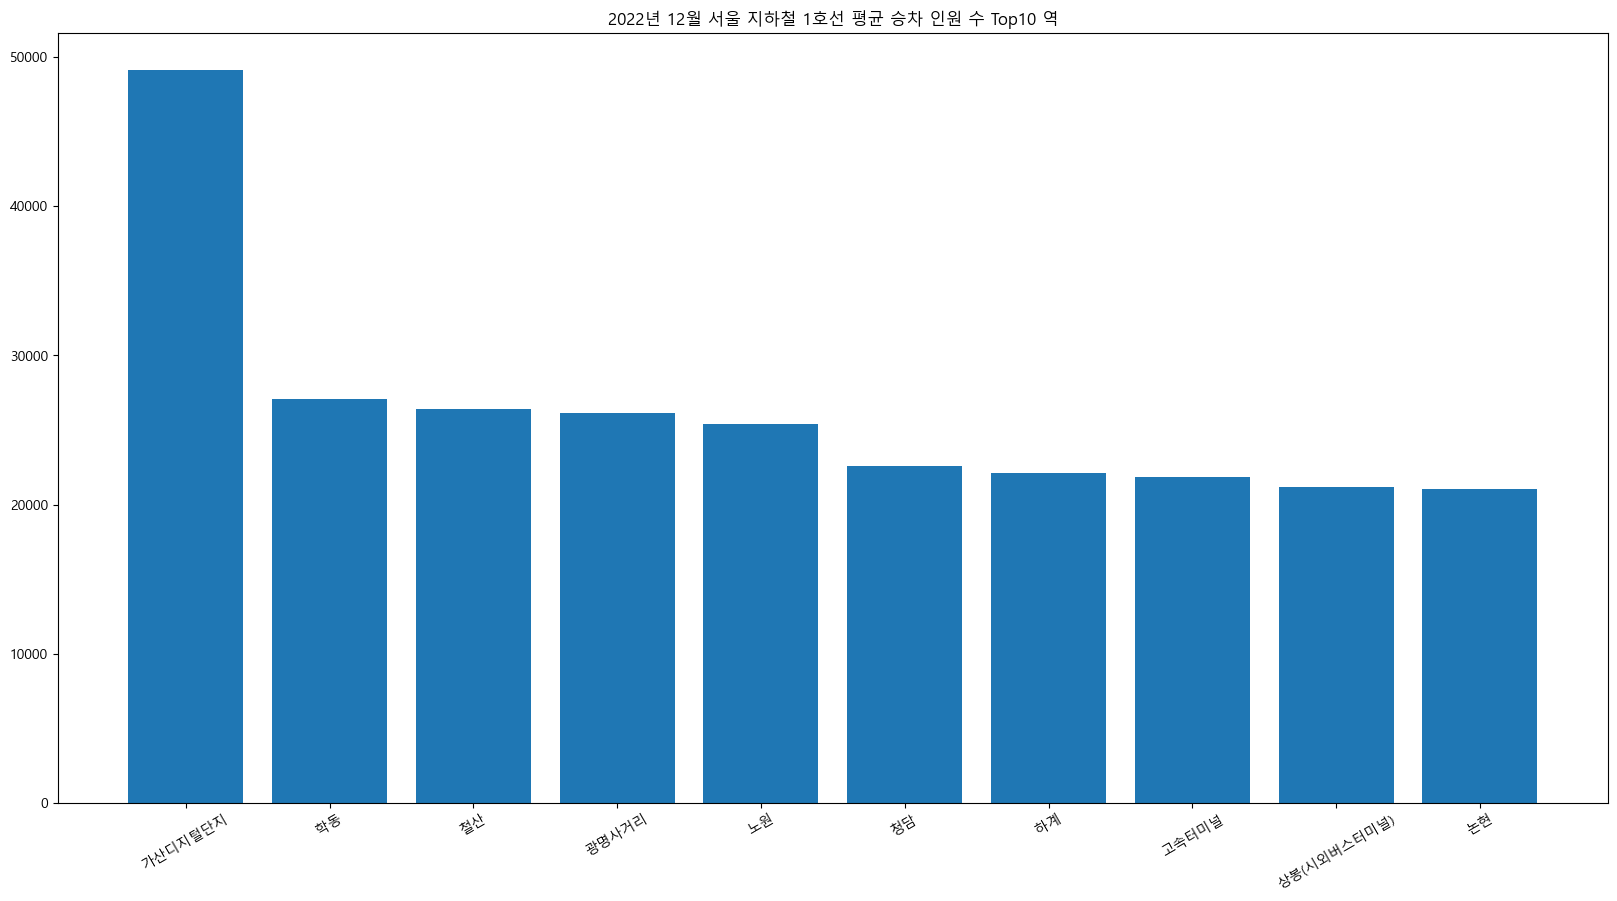

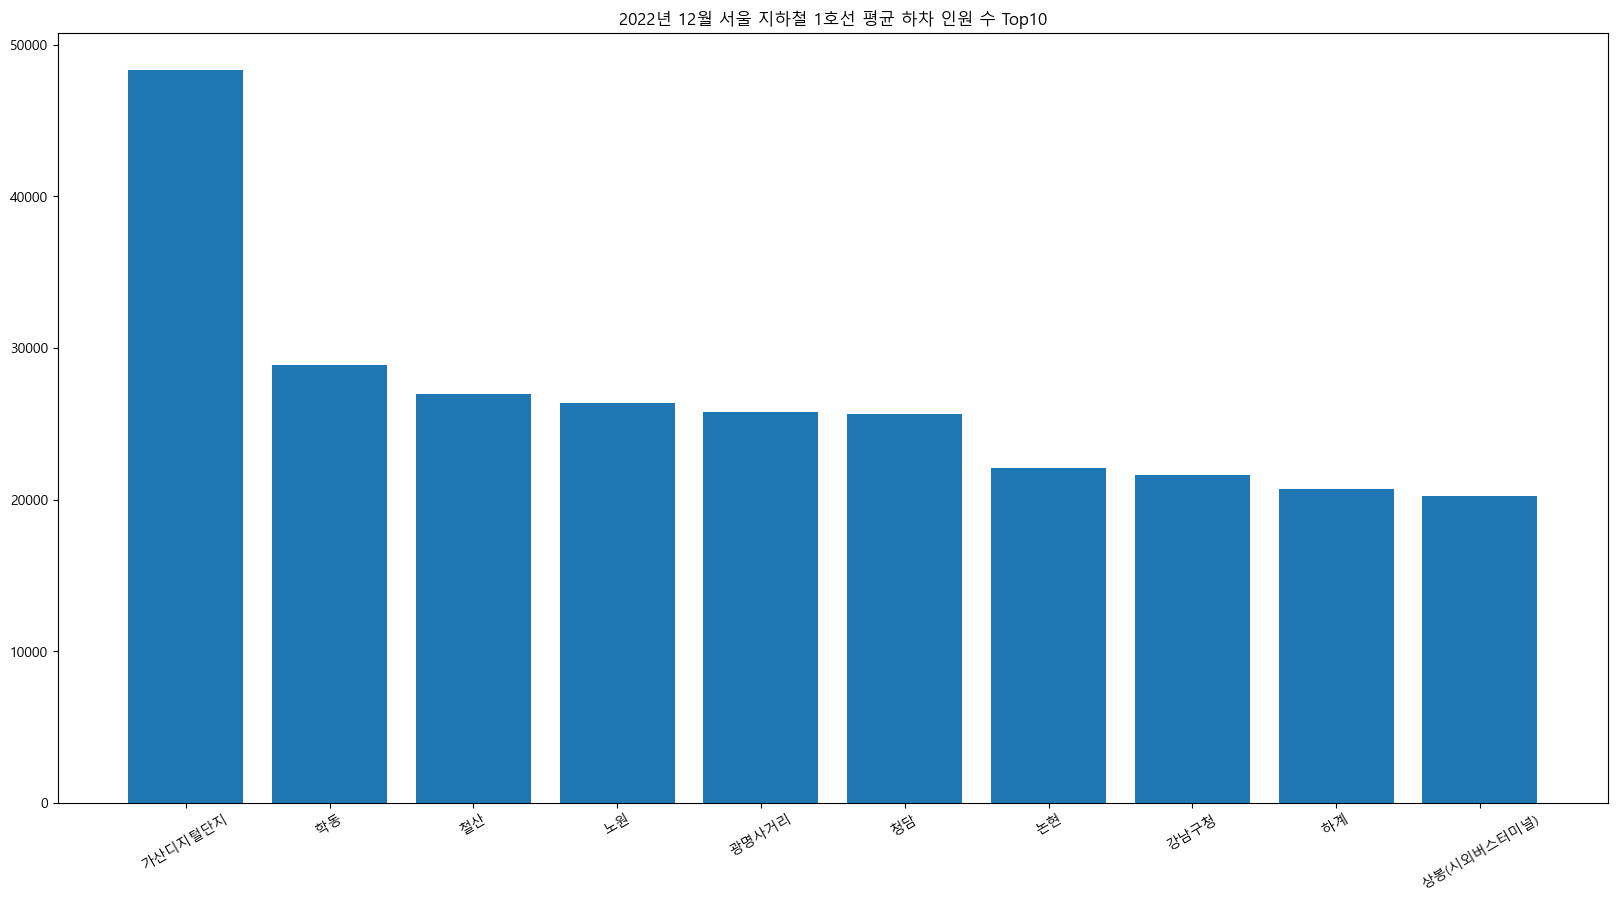

In [34]:
#------- 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

metro_all = pd.read_csv("seoulSubwayTimePlace.csv", encoding = 'cp949')
#----------------22.12월 전 노선 승하차 인원만 추출 ------------
metro_December = metro_all[metro_all['사용월']==202212]
metro_December = metro_December.drop(columns={'작업일자'}) # 불필요한 컬럼 삭제
#---------1호선에서 역별 평균 승하차 인원 보기. (단, pp는 people)
line = input('호선을 입력해주세요')
metro_pp = metro_December.groupby(['호선명','지하철역']).mean().reset_index()
metro_line1 = metro_pp[metro_pp['호선명']==line]
# 12월의 승하차 승객수만 싹다 담은거가 metro_dec.이고 그 값들을 그룹바이 해서 평균 구하고 리셋해서 순번 다시 매겨서
# 이걸 metro_pp에 호선이랑 지하철명 기준으로 묶어서 전달하고
#메트로 피피[][]는 select 호선명 from 테이블 where 1호선을 파이썬 코드로 적은거같다
# ----승차 인원 부분만 따로 추출
metro_take = pd.DataFrame()
metro_take['지하철역'] = metro_line1['지하철역']
for i in range(int((len(metro_December.columns)-3)/2)): #앞에 3개빼고 승차만보니까 나누기2 0~23까지 돈다.
    metro_take[metro_line1.columns[3+2*i]] = metro_line1[metro_line1.columns[3+2*i]]
    #컬럼명을 집어넣어서 역명을 뽑고 싶은데 컬럼명은 메트로라인1의 컬럼의3+2*i. i=0이면 4-5시 승차인원이 나온다
metro_take = metro_take.set_index('지하철역') #지하철역을 인덱스로.
# ----하차 인원 부분만 따로 추출
metro_off = pd.DataFrame()
metro_off['지하철역'] = metro_line1['지하철역']
for i in range(int((len(metro_December.columns)-3)/2)):
    metro_off[metro_line1.columns[4+2*i]] = metro_line1[metro_line1.columns[4+2*i]]
metro_off = metro_off.set_index('지하철역')
# ----역 별 평균 승하차 인원을 구한 후 정수형태로 변환하여 저장
df = pd.DataFrame(index = metro_line1['지하철역'])
df['평균 승차 인원 수'] = metro_take.mean(axis=1).astype(int)# 열기준으로 평균낸거를 인트로 바꿔
df['평균 하차 인원 수'] = metro_off.mean(axis=1).astype(int)
# 승차 인원 상위 10개 역
top10_take = df.sort_values(by='평균 승차 인원 수',ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
plt.xticks(rotation = 30)
plt.rcParams['axes.unicode_minus'] = False # 문자깨짐방지!!!!!!
plt.bar(top10_take.index, top10_take['평균 승차 인원 수'])
plt.title('2022년 12월 서울 지하철 1호선 평균 승차 인원 수 Top10 역')
plt.show()
# 하차 인원 상위 10개 역
top10_off = df.sort_values(by='평균 하차 인원 수',ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
plt.xticks(rotation = 30)
plt.rcParams['axes.unicode_minus'] = False
plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
plt.title('2022년 12월 서울 지하철 1호선 평균 하차 인원 수 Top10')
plt.show()

### 하위목표 5. 해당역 출발 시간별로 혼잡도 그래프(담당 : 임승혁)

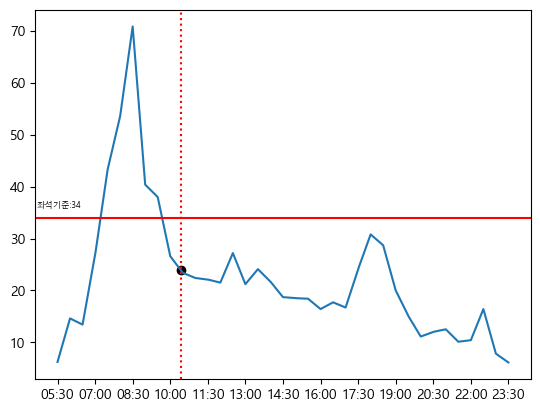

In [9]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
df_conge = pd.read_csv("seoulSubwayCongestion_20211231.csv", encoding = 'cp949')
df_conge2 = df_conge[df_conge.columns[6:]]
range_list = pd.date_range('05:30:00', '23:30:00', freq='30min')
range_list2 = [i for i in range_list.astype(str)]
time_list = []
for i in range_list2:
    time_list.append(i[-8:-3])
df_conge2.columns = time_list
df_conge2 = df_conge2.T.reset_index()
df_conge2['index2'] = datetime.date.today().isoformat() + ' ' + df_conge2['index'] + ':00'
df_conge2['index3'] = pd.to_datetime(df_conge2['index2'])
df_conge2 = df_conge2.drop(['index'], axis = 1)
df_conge2 = df_conge2.drop(['index2'], axis = 1)
df_conge2 = df_conge2.set_index(['index3'])
df_upsample = df_conge2.resample('1T').interpolate(method='linear')
df_upsample = df_upsample.reset_index()
df_upsample['time'] = df_upsample['index3'].dt.strftime('%H:%M')
df_upsample.drop(['index3'], axis =1, inplace = True)
df_upsample.set_index(['time'], inplace = True)
df_upsample = df_upsample.T
df_conge = df_conge[df_conge.columns[:6]]
df_conge_f = pd.concat([df_conge, df_upsample], axis = 1)
tmp_df = df_conge_f.copy()
now = datetime.datetime.now()
right_now = now.isoformat()[11:16]
day = str(input("평일, 토요일, 일요일 중 하나를 입력하세요 : "))
line_num = int(input("호선 번호를 입력하세요 : "))
station_name = str(input("역 이름을 입력하세요 : "))
category = str(input("상선, 하선 여부를 입력하세요 : "))
df_for_plot = tmp_df.loc[
                       (tmp_df['조사일자'] == day) &
                       (tmp_df['호선'] == line_num) &
                       (tmp_df['역명'] == station_name) &
                       (tmp_df['구분'] == category)
                        ]
tl = df_for_plot[df_for_plot.columns[6:]].T.index.tolist()
td = {i:v for i,v in enumerate(tl)}
plt.rc('font', family = 'Malgun Gothic')
plt.plot(df_for_plot[df_for_plot.columns[6:]].T)
plt.xticks(range(0, len(td.keys()), 90))
plt.axhline(y=34, color = 'red')
plt.text(-50,36,'좌석기준:34',fontsize=6)
plt.axvline(x=[k for k, v in td.items() if v == right_now][0], color = 'red', linestyle='dotted')
# 접점
x0 = [k for k, v in td.items() if v == right_now][0]
y0 = td[x0]
plt.scatter(x0,df_for_plot[df_for_plot.columns[6:]][y0], color='black' )

### 최종 GUI 연계용 코드

337
337


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Playdata\AppData\Local\Temp\ipykernel_23468\263976480.py", line 350, in analysis5
    plt.scatter(x0,df_for_plot[df_for_plot.columns[6:]][y0], color='black' )
  File "c:\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 2819, in scatter
    __ret = gca().scatter(
  File "c:\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1412, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 4362, in scatter
    raise ValueError("x and y must be the same size")
ValueError: x and y must be the same size


337
337


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Playdata\AppData\Local\Temp\ipykernel_23468\263976480.py", line 350, in analysis5
    plt.scatter(x0,df_for_plot[df_for_plot.columns[6:]][y0], color='black' )
  File "c:\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 2819, in scatter
    __ret = gca().scatter(
  File "c:\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1412, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 4362, in scatter
    raise ValueError("x and y must be the same size")
ValueError: x and y must be the same size


339
339
345
345
345


C:\Users\Playdata\AppData\Local\Temp\ipykernel_23468\263976480.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


353


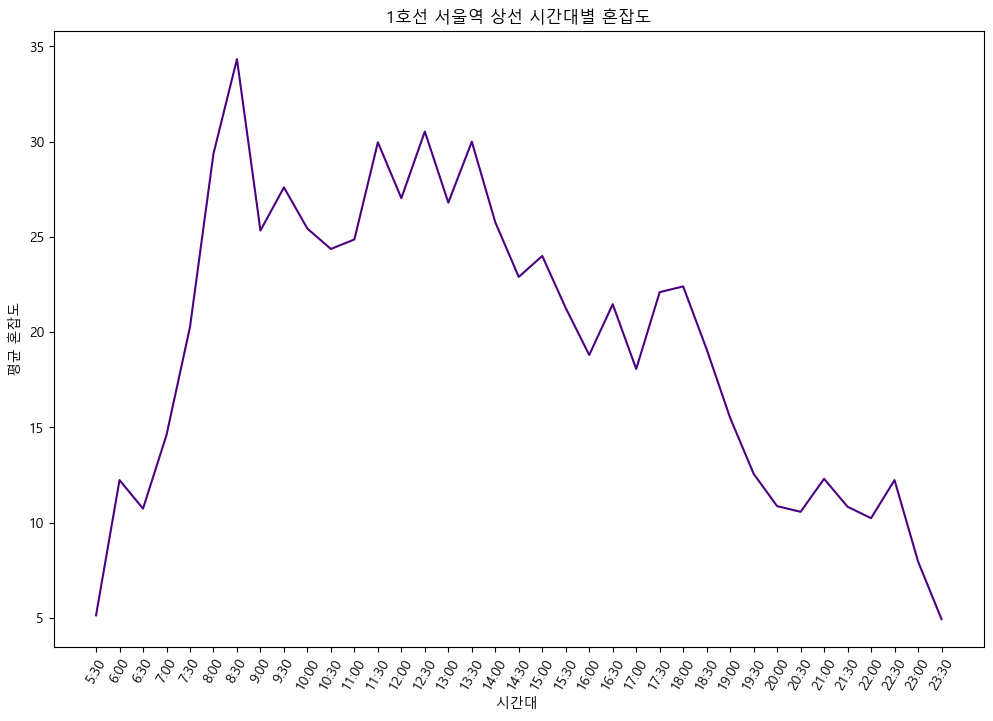

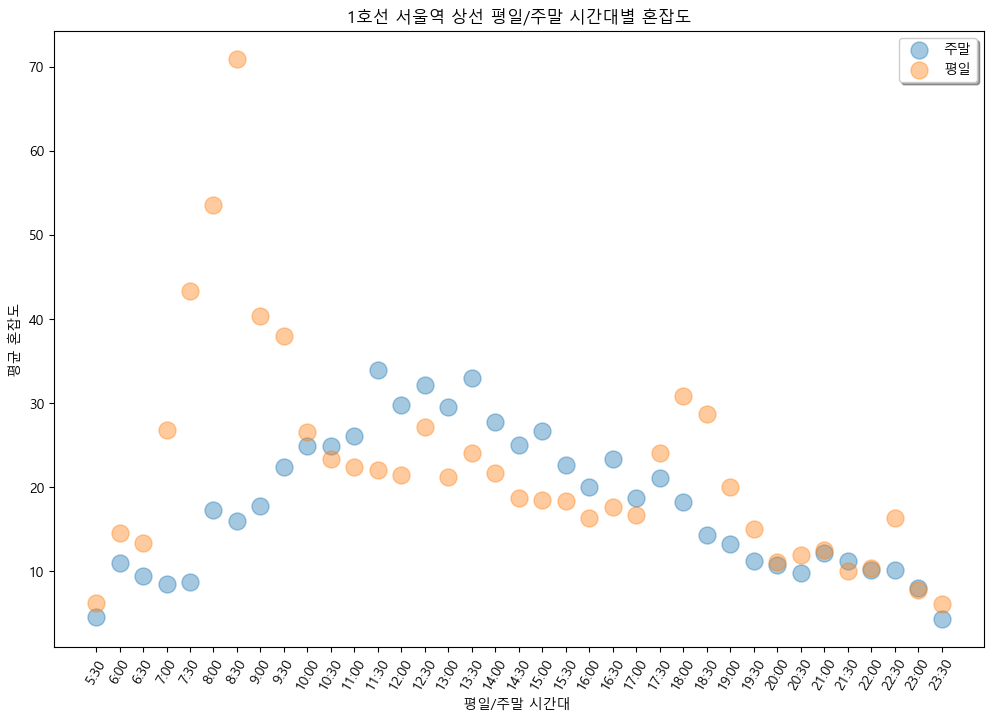

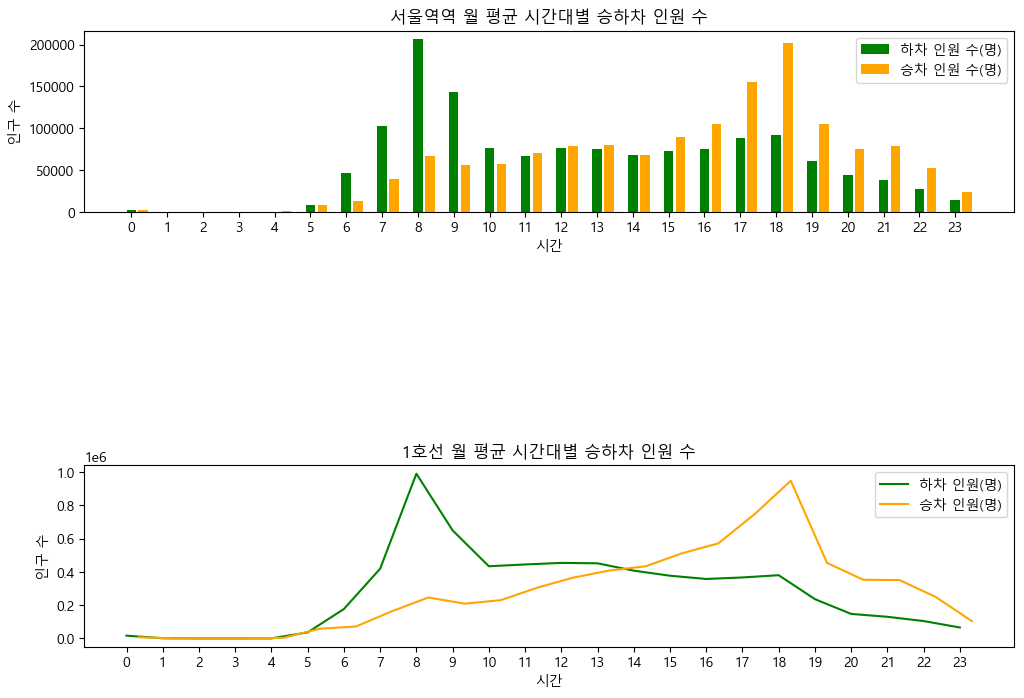

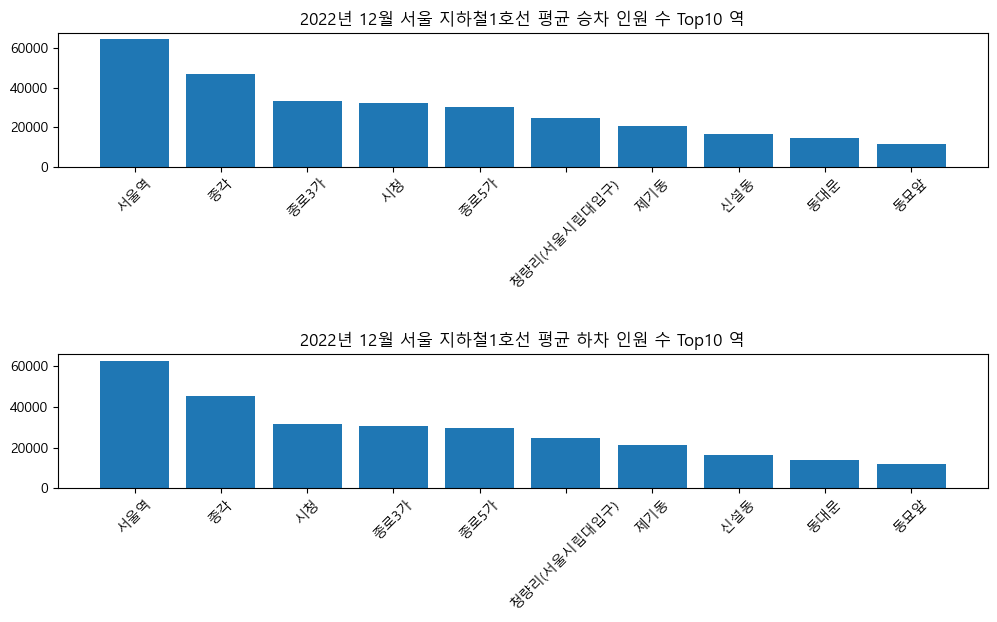

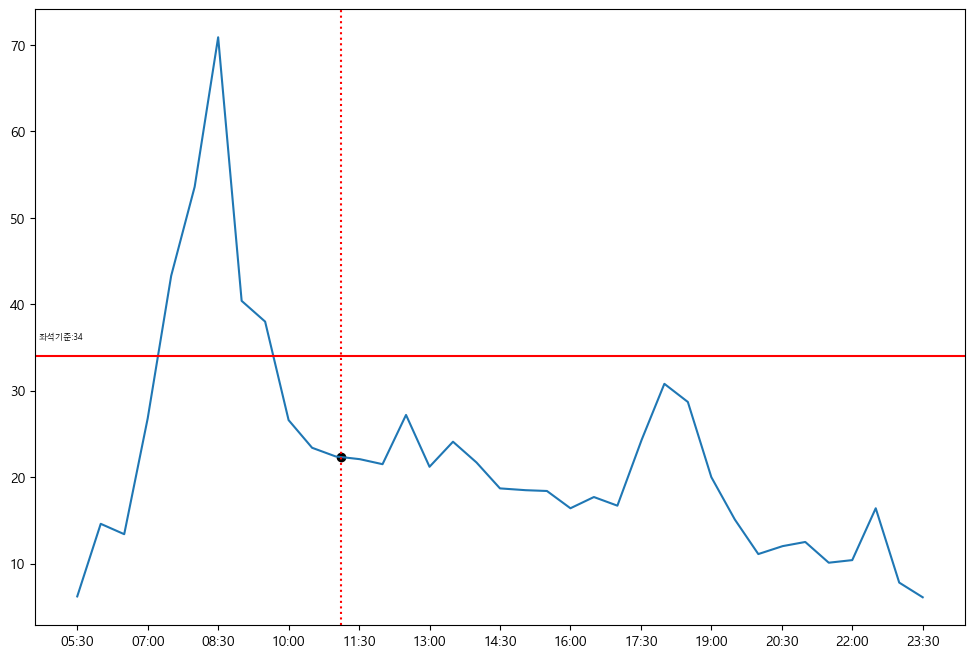

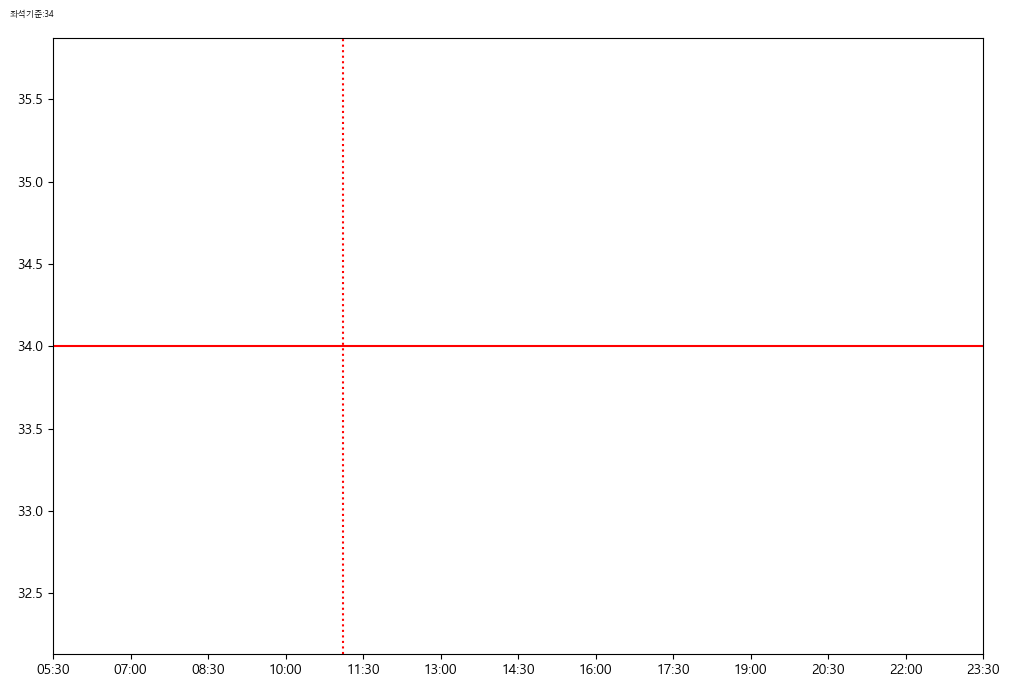

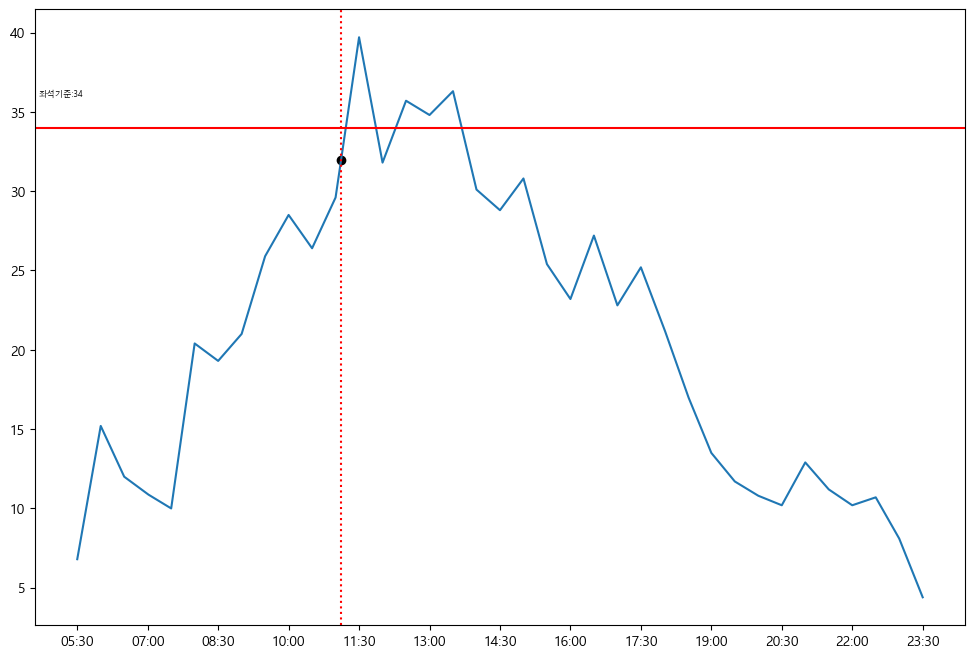

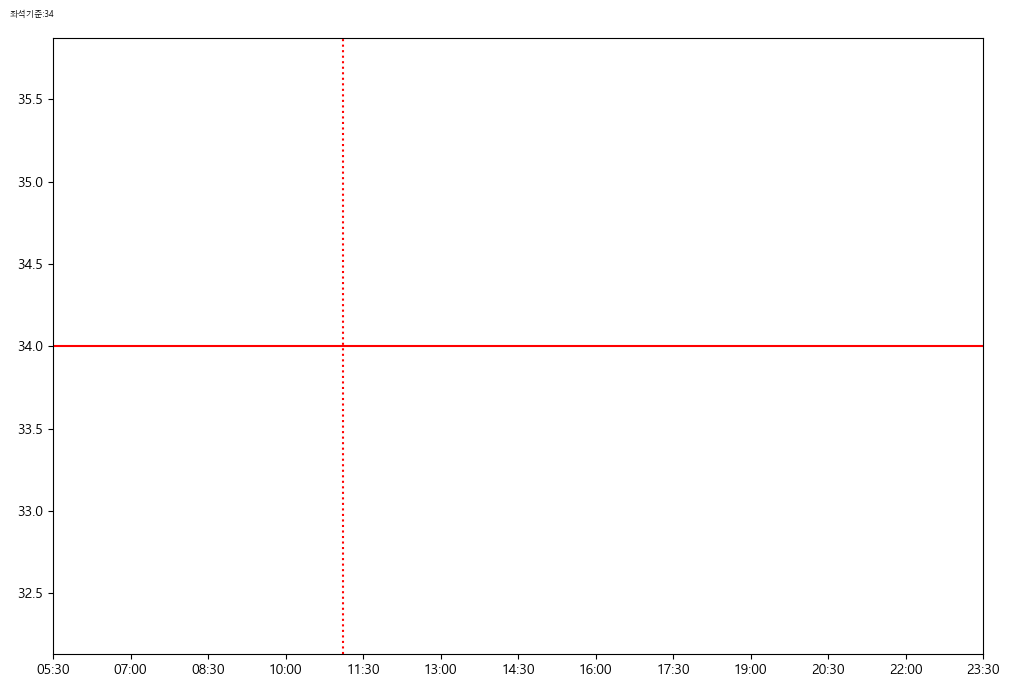

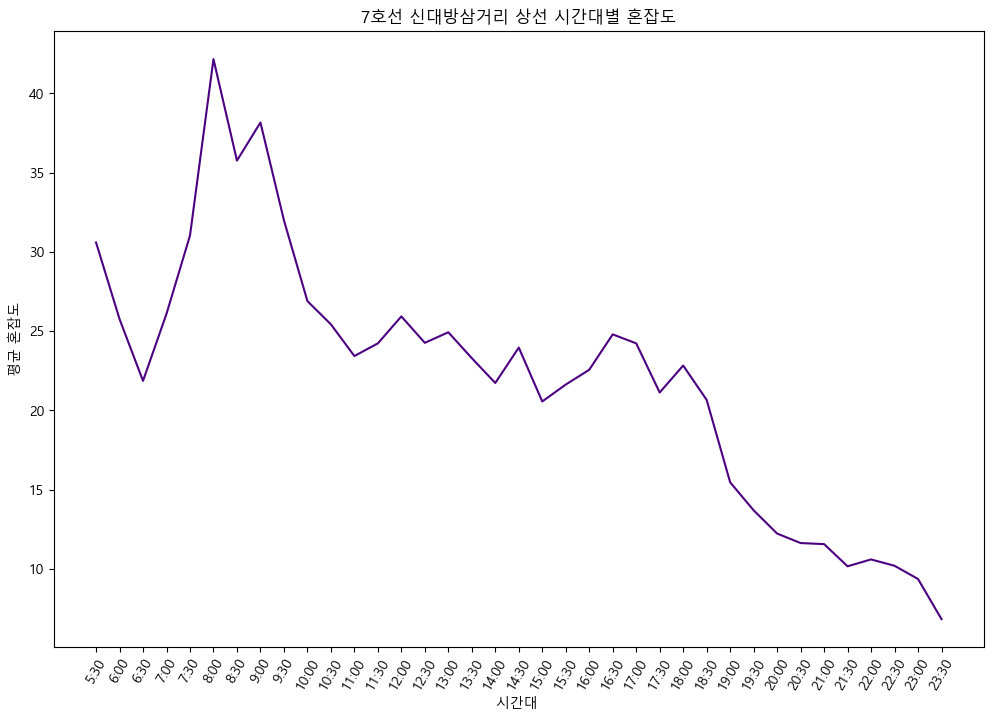

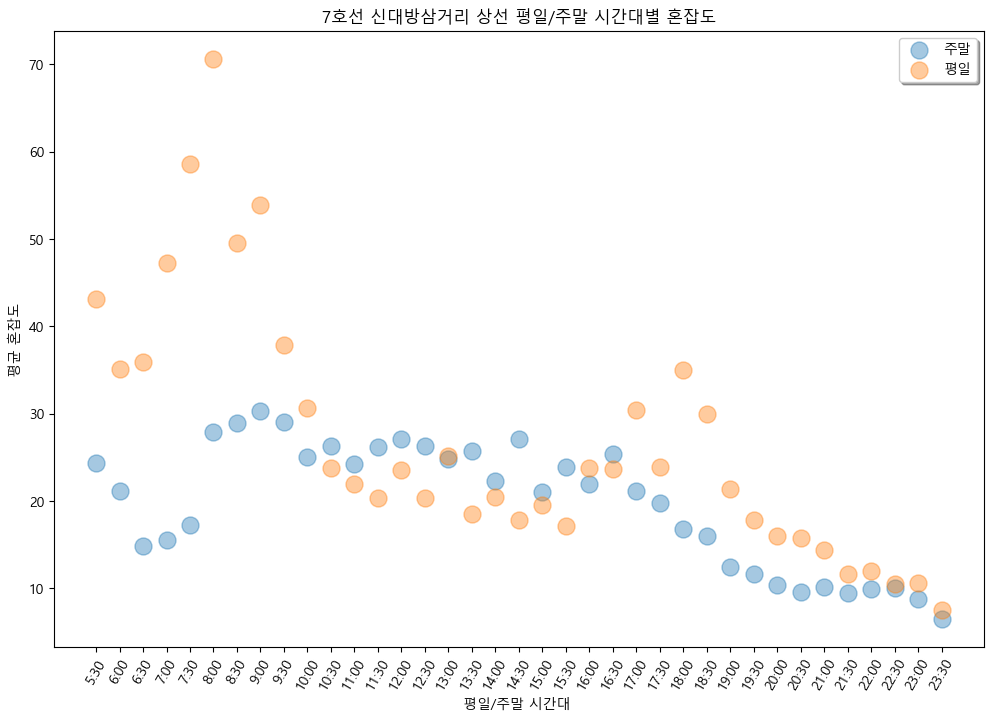

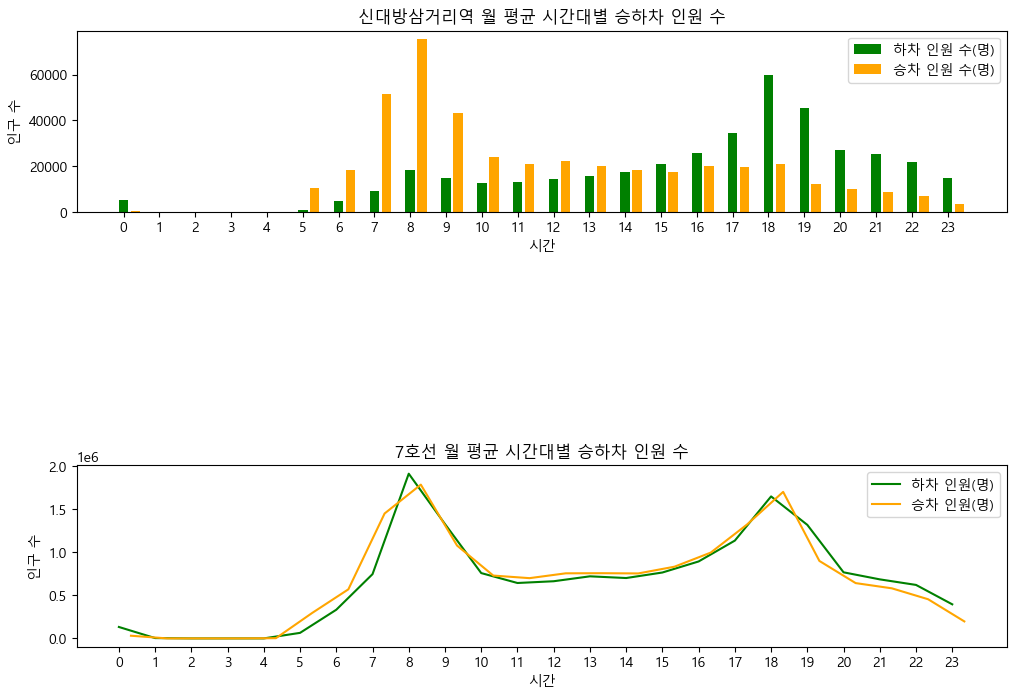

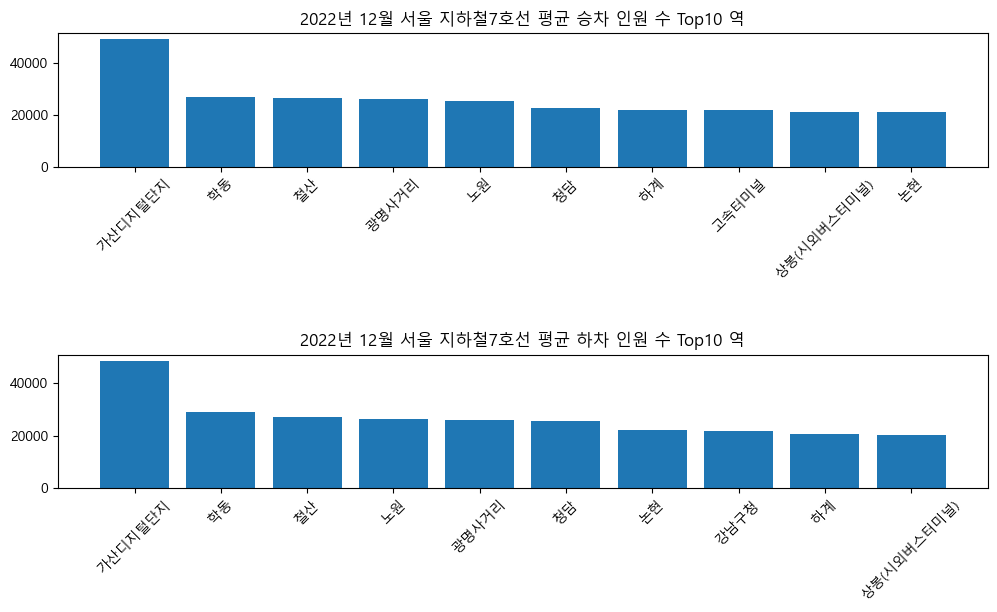

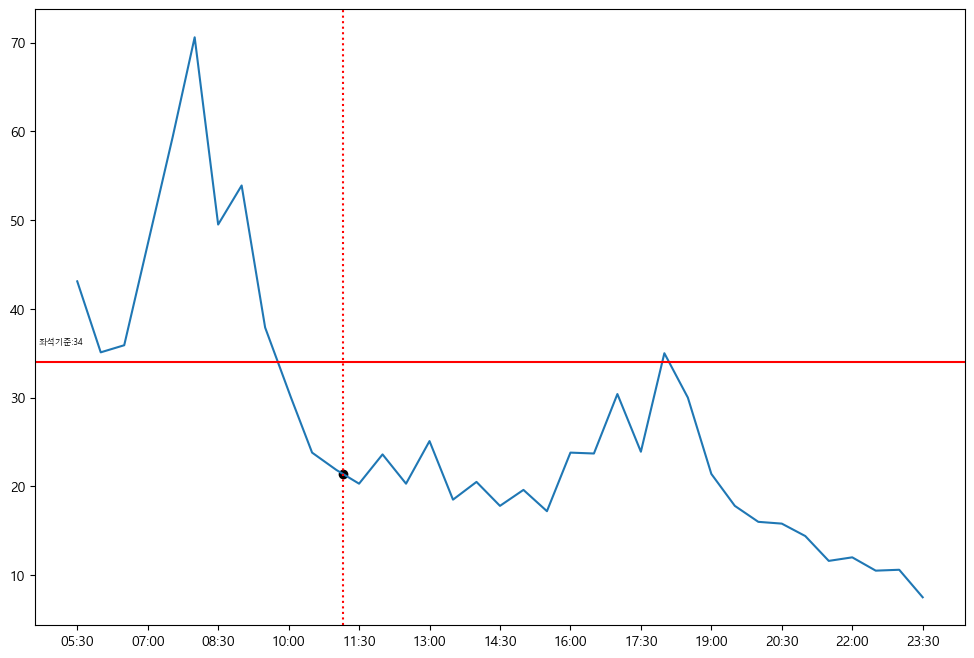

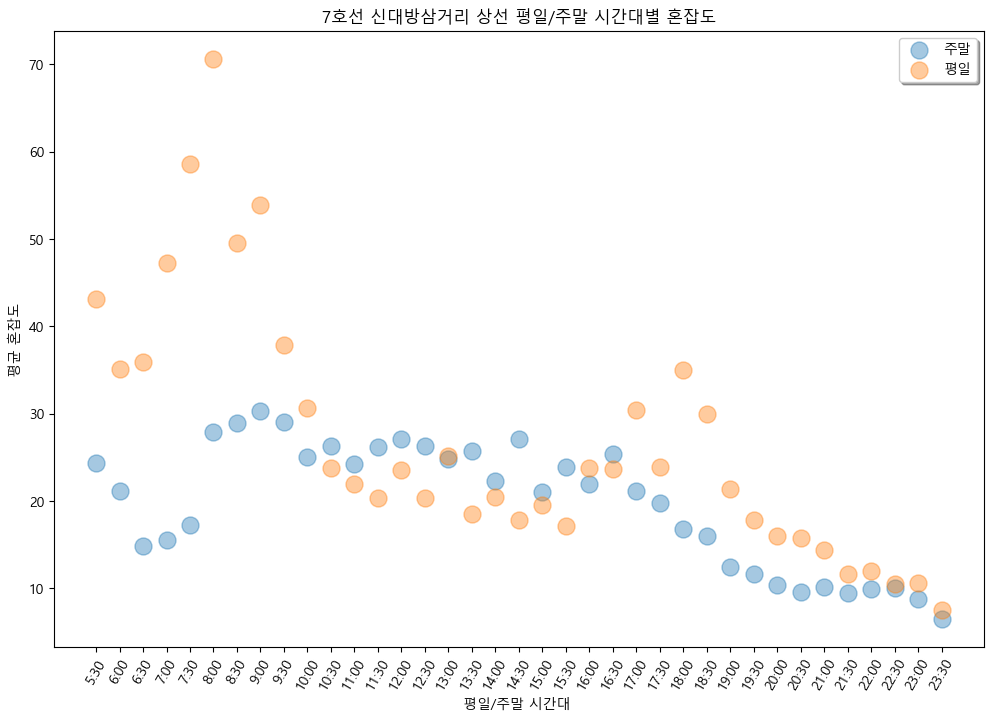

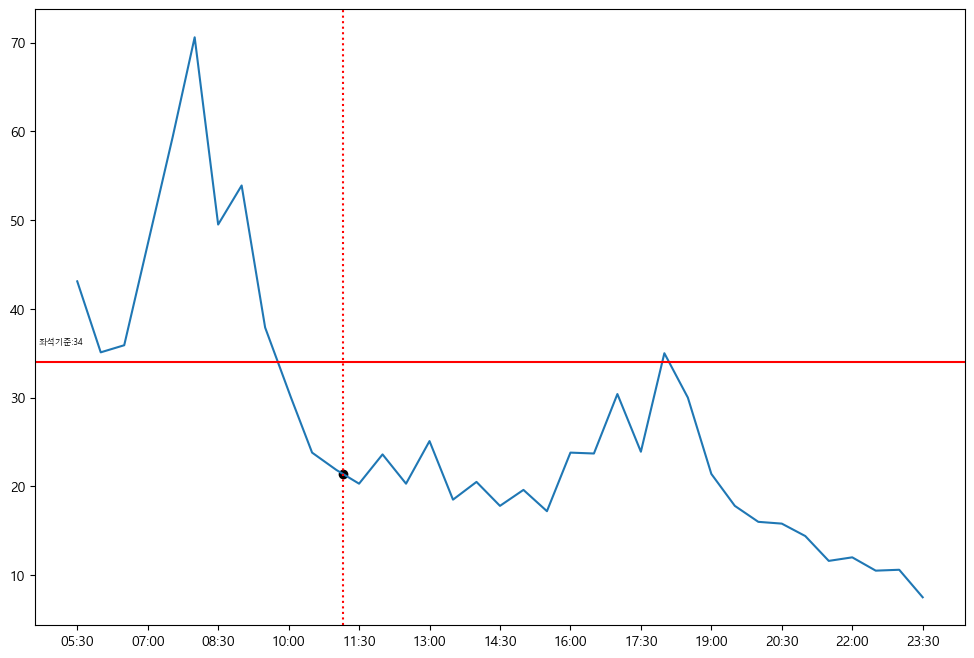

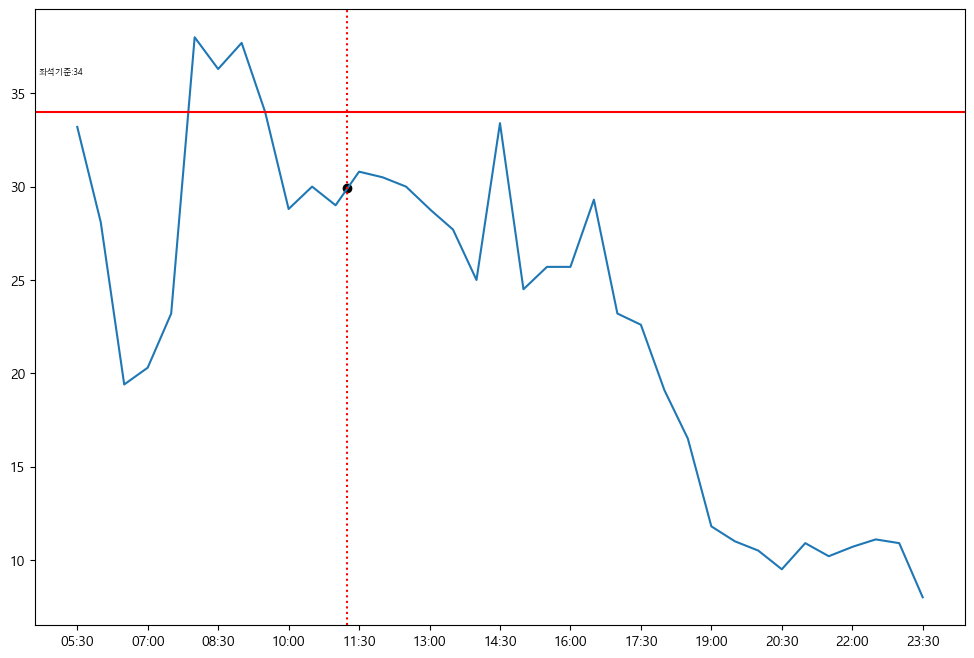

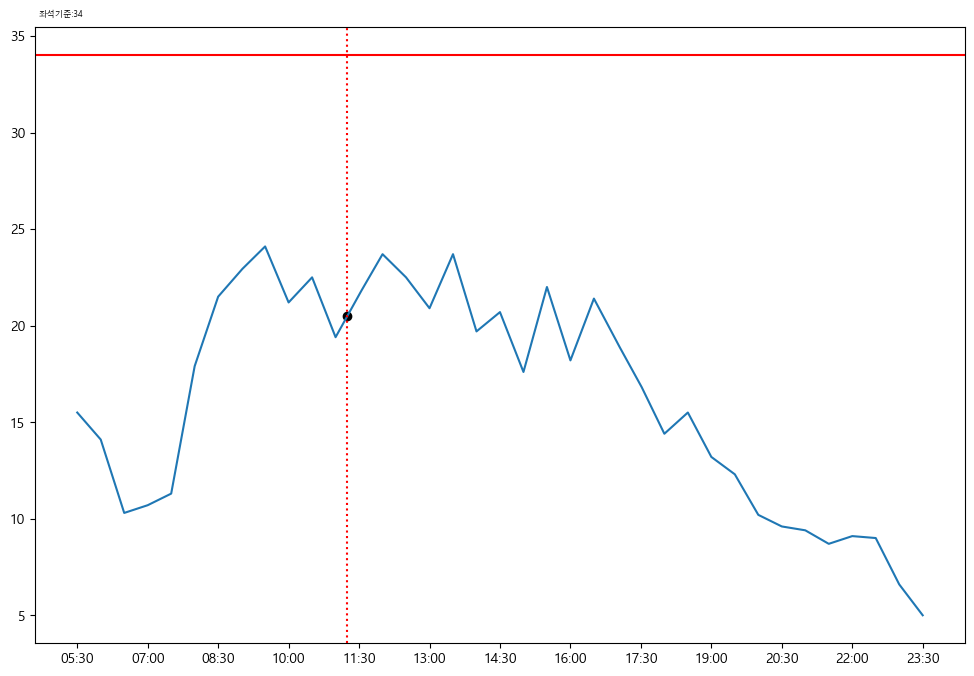

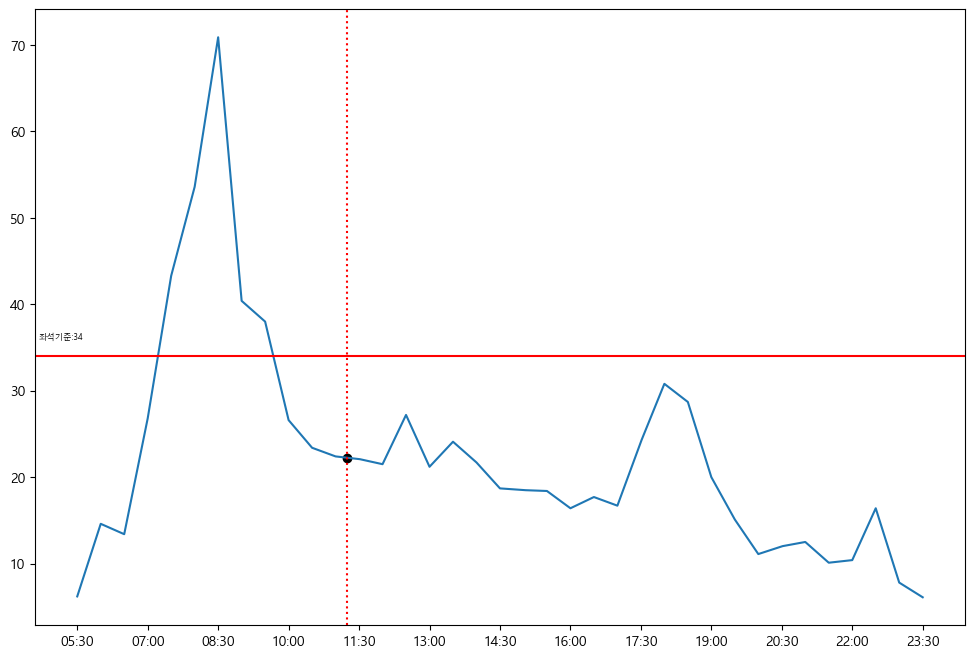

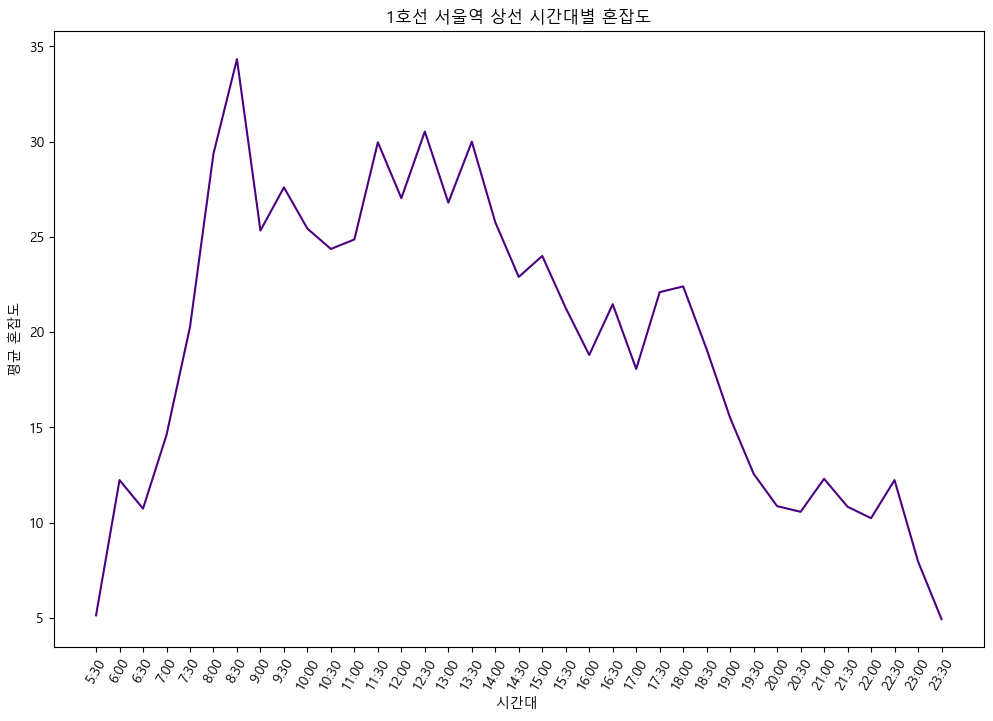

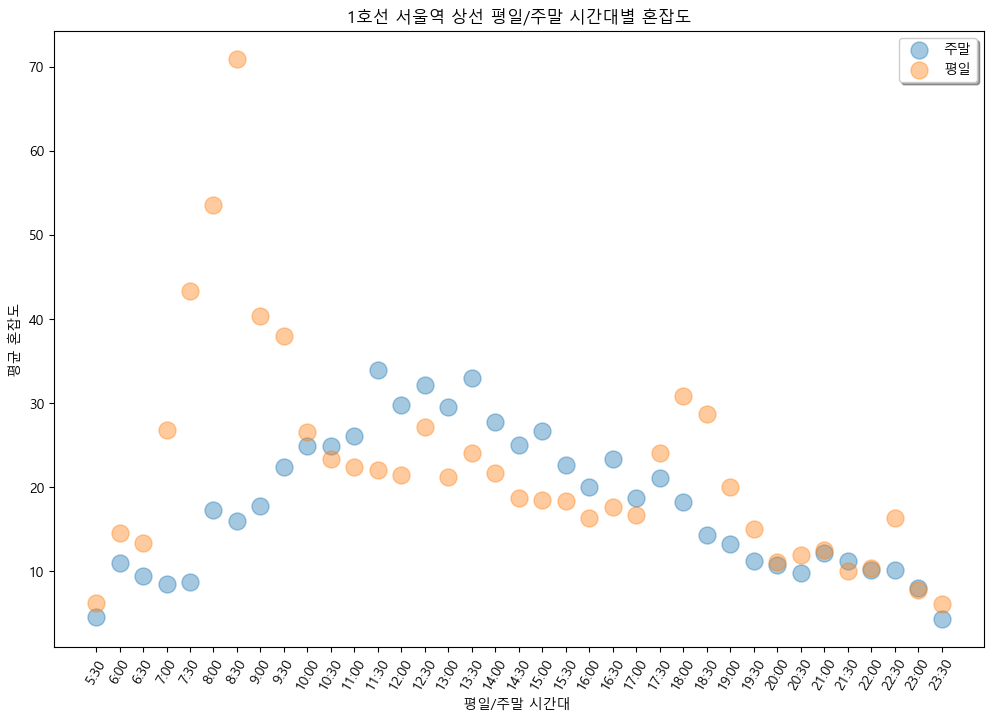

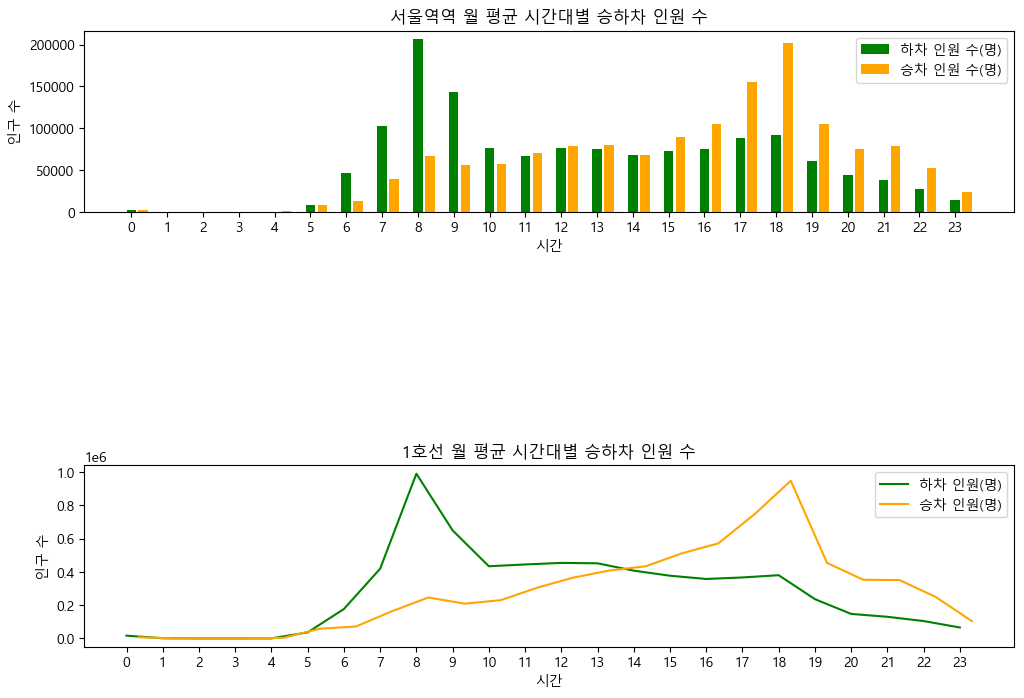

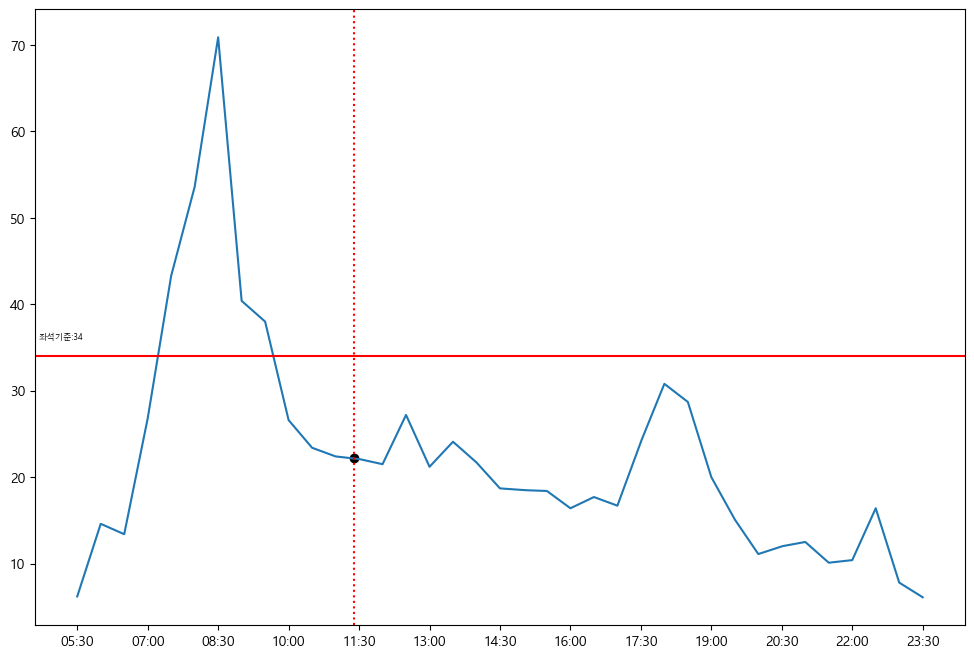

In [3]:
from tkinter import *
import csv 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import datetime

# 전역 변수

subway_line, subway_name,subway_dir = '','',''
x_time = ['5:30','6:00','6:30','7:00','7:30','8:00','8:30','9:00','9:30','10:00','10:30',
            '11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30',
            '16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30',
            '21:00','21:30','22:00','22:30','23:00','23:30']

metro_all = pd.read_csv("seoulSubwayTimePlace.csv", encoding = 'cp949')
#################################################
# ----- 프로그램 기능 부분 -----
#################################################

#-------------------------------
# 1. 파일 읽기
#-------------------------------

def file_open():
    f1 = open('seoulSubwayCongestion_20211231.csv',encoding='cp949')
    data1 = csv.reader(f1)
    next(data1)
    data1 = list(data1)

    for row in data1:
        for i in range(len(row)):
            if i == 2:
                row[i] = int(row[i])
            elif i>5:
                row[i] = float(row[i])

    f2 = open('seoulSubwayTimePlace.csv',encoding='cp949')
    data2 = csv.reader(f2)
    next(data2)
    data2 = list(data2)

    return data1, data2

#-------------------------------
# 2. 지하철 역 찾기
#-------------------------------
def subway_search1(): 
    global subway_line, subway_name,subway_dir,subway_day
    subway_line = subway_ent1.get()
    subway_name = subway_ent2.get()
    subway_dir = subway_ent3.get()
    subway_day = subway_ent4.get()
    
    info.set(subway_line+' 호선'+subway_name+' (역)' + subway_dir +' 대해서 분석합니다.')

#-------------------------------
# 3. 그래프 그리는 함수
#-------------------------------
def graph_plot1(popu_list):
    
    plt.figure(figsize=(12,8))
    plt.rc('font', family='Malgun Gothic')
    plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 시간대별 혼잡도') 
    plt.plot(range(37), popu_list, color='indigo') 
    plt.xticks(range(37), x_time,rotation=60) 
    plt.xlabel('시간대 ') 
    plt.ylabel('평균 혼잡도')
    plt.savefig('graph.png') # 결과 그래프를 이미지로 저장하기 
    # 그래프 이미지를 PhotoImage의 객체로 만들고, graph_lbl 레이블에 표시하기
    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image=graph_img)
    graph_lbl.image = graph_img

def graph_plot2(popu_list1,popu_list2):
    
    plt.figure(figsize=(12,8))
    plt.rc('font', family='Malgun Gothic')
    plt.title(subway_line+'호선 ' + subway_name + " "+ subway_dir +' 평일/주말 시간대별 혼잡도')
    plt.scatter(range(37), popu_list2,  cmap='RdPu', label='주말', alpha=0.4, s=150)
    plt.scatter(range(37), popu_list1[0][6:],  cmap='RdPu', label='평일', alpha=0.4, s=150)
    plt.legend(shadow=True)
    plt.xticks(range(37), x_time,rotation=60)
    plt.xlabel('평일/주말 시간대 ')
    plt.ylabel('평균 혼잡도')
    plt.savefig('graph.png') # 결과 그래프를 이미지로 저장하기

    # 그래프 이미지를 PhotoImage의 객체로 만들고, graph_lbl 레이블에 표시하기
    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image=graph_img)
    graph_lbl.image = graph_img

def graph_plot3(popu_list1,popu_list2):

    plt.figure(figsize=(12,8))
    plt.subplot(4,1,1)
    plt.xticks(rotation = 45)
    plt.rc('font', family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus'] = False
    plt.bar(popu_list1.index, popu_list1['평균 승차 인원 수'])
    plt.title('2022년 12월 서울 지하철'+subway_line+'호선 평균 승차 인원 수 Top10 역')

    plt.rc('font', family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus'] = False
    plt.subplot(4,1,3)
    plt.xticks(rotation = 45)
    plt.bar(popu_list2.index, popu_list2['평균 하차 인원 수'])
    plt.title('2022년 12월 서울 지하철'+subway_line+'호선 평균 하차 인원 수 Top10 역')
    plt.savefig('graph.png') # 결과 그래프를 이미지로 저장하기

    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image=graph_img)
    graph_lbl.image = graph_img

def graph_plot4(popu_list1,popu_list2,popu_list3,popu_list4):

    plt.figure(figsize=(12,8))

    plt.subplot(3,1,1)
    plt.rc('font', family='Malgun Gothic')
    plt.title(subway_name + '역 월 평균 시간대별 승하차 인원 수')
    plt.bar(range(0, 72, 3), popu_list1, color='green', label='하차 인원 수(명)')
    plt.bar(range(1, 72, 3), popu_list2, color='orange', label='승차 인원 수(명)')
    plt.legend()
    plt.xticks(range(0, 72, 3), range(24))
    plt.xlabel('시간')
    plt.ylabel('인구 수')

    plt.subplot(3,1,3)
    plt.rc('font', family='Malgun Gothic')
    plt.title(subway_line + '호선 월 평균 시간대별 승하차 인원 수')
    plt.plot(range(0, 72, 3), popu_list3, color='green', label='하차 인원(명)')
    plt.plot(range(1, 72, 3), popu_list4, color='orange', label='승차 인원(명)')
    plt.legend()
    plt.xticks(range(0, 72, 3), range(24))
    plt.xlabel('시간')
    plt.ylabel('인구 수')
    plt.savefig('graph.png') # 결과 그래프를 이미지로 저장하기

    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image=graph_img)
    graph_lbl.image = graph_img

#-------------------------------
# 하위목표 1
#-------------------------------
def analysis1():
    select_subway = []
    total_select_subway = [0]*37
    
    for row in data1:    
        if row[2]== int(subway_line) and row[4] == subway_name and row[5] == subway_dir:
            select_subway.append(row)

    for row in select_subway:
        for i in range(len(row)):
            if i > 5:
                total_select_subway[i-6] += row[i] 

    total_select_subway = [com/len(select_subway) for com in total_select_subway]
    graph_plot1(total_select_subway)

#-------------------------------    
# 하위목표 2
#-------------------------------
def analysis2(): 
    weekday_select_subway = []
    weekend_select_subway = []
    total_weekend_select_subway = [0]*37

    for row in data1:    
        if row[2]== int(subway_line) and row[4] == subway_name and row[5] == subway_dir:
            if row[1] == '평일':
                weekday_select_subway.append(row)
            else : 
                weekend_select_subway.append(row)

    for row in weekend_select_subway:
        for i in range(len(row)):
            if i > 5:
                total_weekend_select_subway[i-6] += row[i]


    total_weekend_select_subway = [com/len(weekend_select_subway) for com in total_weekend_select_subway]
    graph_plot2(weekday_select_subway, total_weekend_select_subway)

#-------------------------------
# 하위목표 3
#-------------------------------
def analysis3(): 
    #----------------22.12월 전 노선 승하차 인원만 추출 ------------
    metro_December = metro_all[metro_all['사용월']==202212]
    metro_December = metro_December.drop(columns={'작업일자'})
    #---------1호선에서 역별 평균 승하차 인원 보기. (단, pp는 people)
    
    metro_pp = metro_December.groupby(['호선명','지하철역']).mean().reset_index()
    metro_line1 = metro_pp[metro_pp['호선명']==(subway_line+'호선')]

    # ----승차 인원 부분만 따로 추출
    metro_take = pd.DataFrame()
    metro_take['지하철역'] = metro_line1['지하철역']
    for i in range(int((len(metro_December.columns)-3)/2)):
        metro_take[metro_line1.columns[3+2*i]] = metro_line1[metro_line1.columns[3+2*i]]
    metro_take = metro_take.set_index('지하철역')

    # ----하차 인원 부분만 따로 추출
    metro_off = pd.DataFrame()
    metro_off['지하철역'] = metro_line1['지하철역']
    for i in range(int((len(metro_December.columns)-3)/2)):
        metro_off[metro_line1.columns[4+2*i]] = metro_line1[metro_line1.columns[4+2*i]]
    metro_off = metro_off.set_index('지하철역')

    # ----역 별 평균 승하차 인원을 구한 후 정수형태로 변환하여 저장
    df = pd.DataFrame(index = metro_line1['지하철역'])
    df['평균 승차 인원 수'] = metro_take.mean(axis=1).astype(int)
    df['평균 하차 인원 수'] = metro_off.mean(axis=1).astype(int)

    # 승차 인원 상위 10개 역
    top10_take = df.sort_values(by='평균 승차 인원 수',ascending=False).head(10)
    top10_off = df.sort_values(by='평균 하차 인원 수',ascending=False).head(10)
    graph_plot3(top10_take,top10_off)

#-------------------------------
# 하위목표 4
#-------------------------------
def analysis4():
    # 데이터 리스트로 저장
    line_data = []  # 입력받은 지하철 노선의 자료만 가지고 올 빈 리스트 
    line_num = subway_line

    for row in data2:
        # (line_num)호선 & 202206 - 202301까지 8개월의 자료만 가지고 오기
        if row[1] == line_num + '호선' and int(row[0]) >= 202206:
            line_data.append(row)

    # 하차 인원수 숫자형으로 변환
    for row in line_data:
        for i in range(len(line_data[0])):
            if i > 2:
                row[i] = float(row[i])
                

    ## 시간대별 월 평균 역 하차 인원수 구하기

    offPopulation = [0 for i in range(24)]
    onPopulation = [0 for i in range(24)]

    train = subway_name

    offTrain = {}
    # 하차 인원만 더하기
    offSum = 0 # 역별 하차 인원 표현한 변수 초기화
    for row in line_data:
        if row[2] not in offTrain:  # row[2] = 역 이름
            for i in range(4,len(row),2):  # 4부터 짝수 인덱스인 값만 가져와야 함
                offSum += row[i]
            offTrain[row[2]] = offSum
        else:
            for i in range(4,len(row),2):
                offTrain[row[2]] += row[i]

    if train in offTrain.keys():
        for row in line_data:
            if row[2] == train:
                for i in range(24):
                    offPopulation[i] += row[2*i + 4]
                    onPopulation[i] += row[2*i + 3]
                

    # print(offPopulation)
    # print(train_name)
    # 소수점 첫째자리까지 반올림
    offPopulation = [round(p/8, 1) for p in offPopulation] 
    onPopulation = [round(p/8, 1) for p in onPopulation] 

    # 시간 순서 맞추기(4시-3시  => 0시 23시)
    off_train_Population = offPopulation[20:] + offPopulation[0:20]
    on_train_Population = onPopulation[20:] + onPopulation[0:20]

    ## 시간대별 호선 월 평균 하차 인구 수 구하기
    for row in line_data:
        for i in range(24):
            offPopulation[i] += row[2*i + 4]
            onPopulation[i] += row[2*i + 3]

    # 소수점 첫째자리까지 반올림
    offPopulation = [round(p/8, 1) for p in offPopulation]    
    onPopulation = [round(p/8, 1) for p in onPopulation]
    # print(offPopulation)

    # 시간 순서(0시-23시로 맞추기
    off_line_Population = offPopulation[20:] + offPopulation[0:20]
    on_line_Population = onPopulation[20:] + onPopulation[0:20]

    graph_plot4(off_train_Population,on_train_Population,off_line_Population,on_line_Population)

#-------------------------------
# 하위목표 5
#-------------------------------
def analysis5():
    df_conge = pd.read_csv("seoulSubwayCongestion_20211231.csv", encoding = 'cp949')
    df_conge2 = df_conge[df_conge.columns[6:]]
    range_list = pd.date_range('05:30:00', '23:30:00', freq='30min')
    range_list2 = [i for i in range_list.astype(str)]
    time_list = []
    for i in range_list2:
        time_list.append(i[-8:-3])
    df_conge2.columns = time_list
    df_conge2 = df_conge2.T.reset_index()
    df_conge2['index2'] = datetime.date.today().isoformat() + ' ' + df_conge2['index'] + ':00'
    df_conge2['index3'] = pd.to_datetime(df_conge2['index2'])
    df_conge2 = df_conge2.drop(['index'], axis = 1)
    df_conge2 = df_conge2.drop(['index2'], axis = 1)
    df_conge2 = df_conge2.set_index(['index3'])
    df_upsample = df_conge2.resample('1T').interpolate(method='linear')
    df_upsample = df_upsample.reset_index()
    df_upsample['time'] = df_upsample['index3'].dt.strftime('%H:%M')
    df_upsample.drop(['index3'], axis =1, inplace = True)
    df_upsample.set_index(['time'], inplace = True)
    df_upsample = df_upsample.T
    df_conge = df_conge[df_conge.columns[:6]]
    df_conge_f = pd.concat([df_conge, df_upsample], axis = 1)
    tmp_df = df_conge_f.copy()
    now = datetime.datetime.now()
    right_now = now.isoformat()[11:16]
    day = subway_day
    line_num = int(subway_line)
    station_name = subway_name
    category = subway_dir
    df_for_plot = tmp_df.loc[
                        (tmp_df['조사일자'] == day) &
                        (tmp_df['호선'] == line_num) &
                        (tmp_df['역명'] == station_name) &
                        (tmp_df['구분'] == category)
                            ]
    tl = df_for_plot[df_for_plot.columns[6:]].T.index.tolist()
    td = {i:v for i,v in enumerate(tl)}

    plt.figure(figsize=(12,8))
    plt.rc('font', family = 'Malgun Gothic')
    plt.plot(df_for_plot[df_for_plot.columns[6:]].T)
    plt.xticks(range(0, len(td.keys()), 90))
    plt.axhline(y=34, color = 'red')
    plt.text(-50,36,'좌석기준:34',fontsize=6)
    plt.axvline(x=[k for k, v in td.items() if v == right_now][0], color = 'red', linestyle='dotted')
    # 접점
    x0 = [k for k, v in td.items() if v == right_now][0]
    y0 = td[x0]
    print(x0)
    plt.scatter(x0,df_for_plot[df_for_plot.columns[6:]][y0], color='black' )
    plt.savefig('graph.png') # 결과 그래프를 이미지로 저장하기

    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image=graph_img)
    graph_lbl.image = graph_img

#################################################
# 프로그램 실행 부분
#################################################
data1, data2 = file_open() 

#################################################
# ----- 프로그램 화면 부분 -----
#################################################

root = Tk()
root.geometry('800x500')
root.title('지하철 타고 갈 때 언제 앉을 수 있을까?')


#-------------------------------
# ----- 프레임 -----
#-------------------------------
Menu = Frame(root)
Menu.grid(row=0, column=0)
Graph = Frame(root)
Graph.grid(row=3, column=0)

#-------------------------------
# ----- 메뉴 프레임 -----
#-------------------------------
subway_ent1 = Entry(Menu, width=10)
subway_ent1.insert(0, "호선 입력")
subway_ent1.grid(row=0, column=0)

subway_ent2 = Entry(Menu, width=10)
subway_ent2.insert(0, "지하철명")
subway_ent2.grid(row=0, column=1)

subway_ent3 = Entry(Menu, width=10)
subway_ent3.insert(0, "구분")
subway_ent3.grid(row=0, column=2)
 
subway_ent4 = Entry(Menu, width=10)
subway_ent4.insert(0, "평일/토/일")
subway_ent4.grid(row=1, column=0)

dong_btn1 = Button(Menu, text='지하철역 설정', width=20, command=subway_search1)
dong_btn1.grid(row=0, column=3)

info = StringVar()
dong_lbl = Label(Menu, textvariable=info, font=('Malgun Gothic', 12))
dong_lbl.grid(row=2, columnspan=4)

#-------------------------------
# ----- 그래프 프레임 -----
#-------------------------------
btn1 = Button(Graph, text='1. 시간대별 지하철 혼잡도 그래프', width=30, command=analysis1)
btn1.grid(row=0, column=0)

btn2 = Button(Graph, text='2. 주중/주말 지하철 혼잡도 그래프', width=30, command=analysis2)
btn2.grid(row=0, column=1)

btn3 = Button(Graph, text='3. 시간대별 하차 그래프', width=30, command=analysis4)
btn3.grid(row=0, column=2)

btn4 = Button(Graph, text='4. 호선 승하차 TOP10 그래프', width=30, command=analysis3)
btn4.grid(row=1, column=0)

btn5 = Button(Graph, text='5. 해당역 출발 시간별로 혼잡도 그래프', width=30, command=analysis5)
btn5.grid(row=1, column=1)

graph_lbl = Label(Graph)
graph_lbl.grid(row=3, column=0, columnspan=5)


root.mainloop()